<a href="https://colab.research.google.com/github/janwaelty/artwork_valuation/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Neural Networks and the Art Market: A Deep Learning Approach to Valuation
#   **Data preprocessing script**

**1. Library and data import**

In [57]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

drive.mount('/content/drive')
artist_data_path= "/content/drive/My Drive/artist_graph_data.xlsx"
artwork_numeric_data = pd.read_excel(artist_data_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Categorical variables distribution**

Minimum category occurence is 75
Minimum sale_year occurence is 223
Minimum artist occurence is 10
Minimum medium occurence is 1
Minimum sale_house occurence is 1
category                 0
sale_year                0
sale_year_semi           0
sale_price               0
artist                   0
purchase_year            0
purchase_year_semi       0
purchase_price           0
auction_interval         0
return_value             0
artist_num               0
title                    9
sale_low_est             0
sale_high_est            0
purchase_low_est         0
purchase_high_est        0
height                   0
width                    0
medium                  18
sale_date                0
purchase_date            0
mtm                      0
sale_house               0
purchase_house           0
sale_lot                 1
purchase_lot             0
image_url             1201
dtype: int64


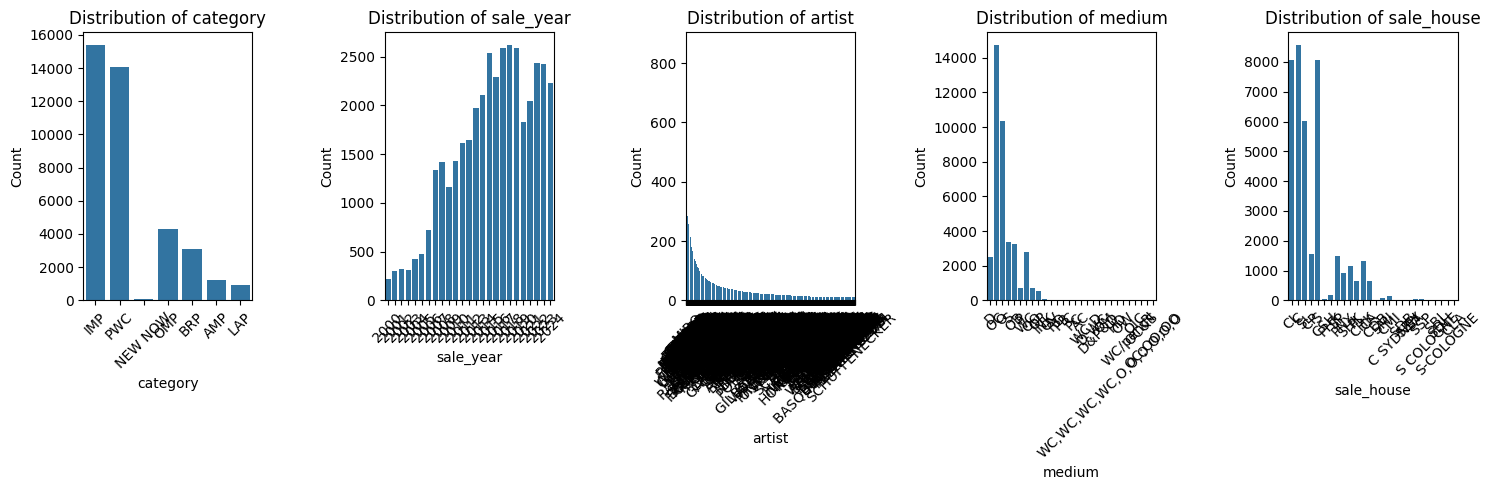

In [56]:
# List of categorical variables
categorical_columns = ['category', 'sale_year', 'artist',
                                       'medium', 'sale_house']

# get minimum occurence per variable
for idx, var in enumerate(categorical_columns):
  counts = artwork_numeric_data[var].value_counts()
  print(f"Minimum {var} occurence is {min(counts)}")

# remove entries with missing values
missing_values = artwork_numeric_data.isna().sum()
print(missing_values)
artwork_numeric_data.dropna(axis=0, how='any', inplace=True)


# visualize distribution of categorical variables
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))


for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


**3.Numerical features preprocessing**

Preprocessing (one-hot encoding of categorical features, drop of irrelevant categories etc)

In [60]:
print(artwork_numeric_data.dtypes)



def one_hot(data, vars):
  # one-hot encoding for various categorical variables
  data = pd.get_dummies(data, columns=vars).astype(int)
  return data

def tf_vectorizer(data):
  tfidf = TfidfVectorizer()
  tfidf_matrix = tfidf.fit_transform(data['title'])
  tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
  return pd.concat([data, tfidf_df], axis=1)



artwork_numeric_data = one_hot(artwork_numeric_data,categorical_columns)
artwork_numeric_data = tf_vectorizer(artwork_numeric_data)


category               object
sale_year               int64
sale_year_semi        float64
sale_price              int64
artist                 object
purchase_year           int64
purchase_year_semi    float64
purchase_price          int64
auction_interval      float64
return_value          float64
artist_num              int64
title                  object
sale_low_est            int64
sale_high_est           int64
purchase_low_est        int64
purchase_high_est       int64
height                  int64
width                   int64
medium                 object
sale_date              object
purchase_date          object
mtm                     int64
sale_house             object
purchase_house         object
sale_lot               object
purchase_lot           object
image_url              object
dtype: object


ValueError: invalid literal for int() with base 10: 'TETE DE TAUREAU'